In [1]:
# Mounting google drive to save and access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from tensorflow.keras.models import load_model

In [2]:
# Defining paths
test_data_path = '/content/drive/MyDrive/00_Final_Project_MENG/Dataset_1/test_data.csv'
model_path = '/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_trained_model_dataset1.keras'
scaler_path = '/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_scaler.sav'

In [6]:
# Load and prepare validation set
test_df = pd.read_csv(test_data_path)         # load Test CSV

X_test = test_df.drop(columns=['__target__']) # features (all columns except target)
y_test = test_df['__target__']                # target labels

In [7]:
# Display the DataFrame
print(f"Test DataFrame shape: {test_df.shape}")

Test DataFrame shape: (322, 1873)


In [8]:
# Display first 5 rows
test_df.head(5)

,abdominal_and_pelvic_pain,abdominal_aortic_aneurysm__without_rupture,abdominal_distension__gaseous_,abn_findings_on_dx_imaging_of_abd_regions__inc_retroperiton,abnormal_and_inconclusive_findings_on_dx_imaging_of_breast,abnormal_blood_pressure_reading__without_diagnosis,abnormal_coagulation_profile,abnormal_electrocardiogram__ecg___ekg_,abnormal_finding_of_blood_chemistry__unspecified,abnormal_findings_on_diagnostic_imaging_and_in_function_studies__without_diagnosis,...,vomiting__unspecified,vomiting_without_nausea,weakness,wheezing,white_matter_disease__unspecified,wtrcraft_fall_nos_crew,xerosis_cutis,zoster__herpes_zoster_,zoster_without_complications,__target__
0,1,1,1,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
4,0,0,0,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,1,1,1


In [9]:
# Load saved scaler and scale test data

scaler = joblib.load(scaler_path)       # load the previously saved scaler
X_test_scaled = scaler.transform(X_test)  # apply scaling to test data

In [10]:
# Load Trained MLP model
model = load_model(model_path)

In [11]:
# Generate predictions on Test data set

# Get predicted probabilities (values between 0 and 1)
y_pred_probs = model.predict(X_test_scaled).flatten()

# Convert probabilities to binary class labels (threshold = 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [12]:
# Evaluate model performance on Test data set

# Accuracy
acc = accuracy_score(y_test, y_pred)
# Precision
prec = precision_score(y_test, y_pred)
# Recall
rec = recall_score(y_test, y_pred)
# F1-score
f1 = f1_score(y_test, y_pred)
# AUC (ROC)
auc = roc_auc_score(y_test, y_pred_probs)

print("Test Data Metrics: MLP Model (Dataset 1)")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")

# Classification report
print("\nClassification Report MLP Model (Test Set - Dataset 1):")
print(classification_report(y_test, y_pred))

Test Data Metrics: MLP Model (Dataset 1)
Accuracy:  0.7826
Precision: 0.7758
Recall:    0.7950
F1-score:  0.7853
AUC:       0.8735

Classification Report MLP Model (Test Set - Dataset 1):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       161
           1       0.78      0.80      0.79       161

    accuracy                           0.78       322
   macro avg       0.78      0.78      0.78       322
weighted avg       0.78      0.78      0.78       322



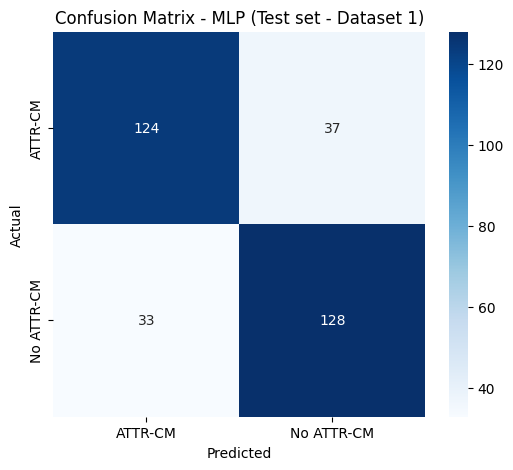

In [13]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['ATTR-CM', 'No ATTR-CM'],  # predicted labels
    yticklabels=['ATTR-CM', 'No ATTR-CM']   # actual labels
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP (Test set - Dataset 1)')
plt.show()


In [14]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

ROC AUC Score: 0.8735388295204661


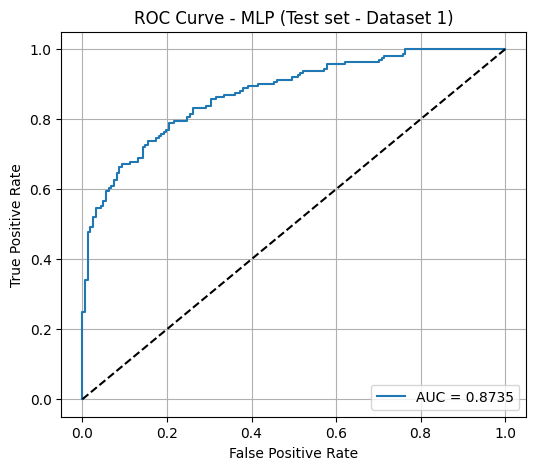

In [15]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1], [0,1], 'k--')     # diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP (Test set - Dataset 1)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [16]:
# Save Test Set Predictions

# Create a DataFrame with true labels, predicted labels, and predicted probabilities
results_df = pd.DataFrame({
    'true_label': y_test,
    'predicted_label': y_pred,
    'predicted_probability': y_pred_probs
})

# Define path to save CSV
results_csv_path = '/content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_test_predictions.csv'

# Save to CSV without the index
results_df.to_csv(results_csv_path, index=False)

print(f"Predictions saved to: {results_csv_path}")


Predictions saved to: /content/drive/MyDrive/00_Final_Project_MENG/MLP/mlp_test_predictions.csv


In [17]:
# Display first 10 predictions
print(results_df.head(10))

   true_label  predicted_label  predicted_probability
0           0                0               0.000007
1           1                1               0.998691
2           0                0               0.077318
3           1                1               1.000000
4           1                1               1.000000
5           0                0               0.000799
6           1                1               0.999997
7           0                0               0.010974
8           1                1               0.999998
9           1                0               0.349272
